In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/medicare-payment-physician-and-othersuppliers/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2018.csv


In [5]:
import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
medicare_df = pd.read_csv('../input/medicare-payment-physician-and-othersuppliers/Medicare_Provider_Utilization_and_Payment_Data__Physician_and_Other_Supplier_PUF_CY2018.csv')
medicare_df.head

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3166: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<bound method NDFrame.head of          National Provider Identifier        Last Name/Organization Name of the Provider First Name of the Provider Middle Initial of the Provider Credentials of the Provider Gender of the Provider Entity Type of the Provider Street Address 1 of the Provider Street Address 2 of the Provider City of the Provider Zip Code of the Provider State Code of the Provider Country Code of the Provider      Provider Type Medicare Participation Indicator Place of Service HCPCS Code                                  HCPCS Description HCPCS Drug Indicator Number of Services Number of Medicare Beneficiaries Number of Distinct Medicare Beneficiary/Per Day Services Average Medicare Allowed Amount Average Submitted Charge Amount Average Medicare Payment Amount Average Medicare Standardized Amount
0                                   1  CPT copyright 2017 American Medical Associatio...                        NaN                            NaN                         NaN        

In [8]:
medicare_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961866 entries, 0 to 9961865
Data columns (total 26 columns):
 #   Column                                                    Dtype 
---  ------                                                    ----- 
 0   National Provider Identifier                              int64 
 1   Last Name/Organization Name of the Provider               object
 2   First Name of the Provider                                object
 3   Middle Initial of the Provider                            object
 4   Credentials of the Provider                               object
 5   Gender of the Provider                                    object
 6   Entity Type of the Provider                               object
 7   Street Address 1 of the Provider                          object
 8   Street Address 2 of the Provider                          object
 9   City of the Provider                                      object
 10  Zip Code of the Provider                  

In [9]:
medicare_df.describe(include='all')

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,State Code of the Provider,Country Code of the Provider,Provider Type,Medicare Participation Indicator,Place of Service,HCPCS Code,HCPCS Description,HCPCS Drug Indicator,Number of Services,Number of Medicare Beneficiaries,Number of Distinct Medicare Beneficiary/Per Day Services,Average Medicare Allowed Amount,Average Submitted Charge Amount,Average Medicare Payment Amount,Average Medicare Standardized Amount
count,9.961866e+06,9961722,9542167,6960447,9229439,9542267,9961865,9960178,3696167,9960179,9960178.0,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865,9961865
unique,NaN,261948,68724,32,16515,2,2,375052,66750,12891,31623.0,61,27,99,2,2,6070,5512,2,30276,9472,11981,3436852,2028975,5873628,6136005
top,NaN,PATEL,MICHAEL,A,M.D.,M,I,200 1ST ST SW,SUITE 200,NEW YORK,77030.0,CA,US,Diagnostic Radiology,Y,O,99213,Established patient office or other outpatient...,N,12,11,12,3,150,2.94,2.94
freq,NaN,58967,233699,801773,3214869,6511225,9542267,25877,144966,105605,30861.0,774584,9959601,1246653,9958654,6132242,464384,464384,9350652,305626,487776,327406,96719,97789,61893,85634
mean,1.499541e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.877158e+08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.245730e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.497959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.740646e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
medicare_df.isna().sum()

National Provider Identifier                                      0
Last Name/Organization Name of the Provider                     144
First Name of the Provider                                   419699
Middle Initial of the Provider                              3001419
Credentials of the Provider                                  732427
Gender of the Provider                                       419599
Entity Type of the Provider                                       1
Street Address 1 of the Provider                               1688
Street Address 2 of the Provider                            6265699
City of the Provider                                           1687
Zip Code of the Provider                                       1688
State Code of the Provider                                        1
Country Code of the Provider                                      1
Provider Type                                                     1
Medicare Participation Indicator                

In [11]:
medicare_new = medicare_df.drop(['Last Name/Organization Name of the Provider',
                                 'First Name of the Provider',
                                 'Middle Initial of the Provider',
                                 'Credentials of the Provider',
                                 'Street Address 1 of the Provider',
                                 'Street Address 2 of the Provider',
                                  'Number of Distinct Medicare Beneficiary/Per Day Services',                           
                                  'Average Medicare Standardized Amount'],axis =1)

In [12]:
medicare_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961866 entries, 0 to 9961865
Data columns (total 18 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   National Provider Identifier      int64 
 1   Gender of the Provider            object
 2   Entity Type of the Provider       object
 3   City of the Provider              object
 4   Zip Code of the Provider          object
 5   State Code of the Provider        object
 6   Country Code of the Provider      object
 7   Provider Type                     object
 8   Medicare Participation Indicator  object
 9   Place of Service                  object
 10  HCPCS Code                        object
 11  HCPCS Description                 object
 12  HCPCS Drug Indicator              object
 13  Number of Services                object
 14  Number of Medicare Beneficiaries  object
 15  Average Medicare Allowed Amount   object
 16  Average Submitted Charge Amount   object
 17  Average 

In [13]:
medicare_new=medicare_new.rename(columns = {'National Provider Identifier':'npi',                                  
                                  'Gender of the Provider':'nppes_provider_gender',
                                  'Entity Type of the Provider':'nppes_entity_code',                                
                                  'City of the Provider':'nppes_provider_city',
                                  'Zip Code of the Provider':'nppes_provider_zip',
                                  'State Code of the Provider':'nppes_provider_state',
                                  'Country Code of the Provider':'nppes_provider_country',
                                  'Provider Type':'provider_type',
                                  'Medicare Participation Indicator':'medicare_participation_indicator',                                 
                                  'HCPCS Code':'hcpcs_code',
                                  'HCPCS Description':'hcpcs_description',
                                  'HCPCS Drug Indicator':'hcpcs_drug_indicator',
                                  'Number of Services':'line_srvc_cnt',
                                  'Number of Medicare Beneficiaries':'bene_unique_cnt',
                                  'Average Medicare Allowed Amount':'average_Medicare_allowed_amt',
                                  'Average Submitted Charge Amount':'average_submitted_chrg_amt',
                                  'Average Medicare Payment Amount':'average_Medicare_payment_amt',
                                            'Place of Service':'place_of_service'
                                  
                                  })

In [14]:
medicare_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9961866 entries, 0 to 9961865
Data columns (total 18 columns):
 #   Column                            Dtype 
---  ------                            ----- 
 0   npi                               int64 
 1   nppes_provider_gender             object
 2   nppes_entity_code                 object
 3   nppes_provider_city               object
 4   nppes_provider_zip                object
 5   nppes_provider_state              object
 6   nppes_provider_country            object
 7   provider_type                     object
 8   medicare_participation_indicator  object
 9   place_of_service                  object
 10  hcpcs_code                        object
 11  hcpcs_description                 object
 12  hcpcs_drug_indicator              object
 13  line_srvc_cnt                     object
 14  bene_unique_cnt                   object
 15  average_Medicare_allowed_amt      object
 16  average_submitted_chrg_amt        object
 17  average_

In [15]:
medicare_new.head(14)

,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99217,Hospital observation care on day of discharge,N,68,67,73.821029412,381.30882353,57.880294118
2,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99218,"Hospital observation care, typically 30 minutes",N,19,19,100.88315789,476.94736842,76.795263158
3,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99220,"Hospital observation care, typically 70 minutes",N,26,26,188.11076923,"1,086.9230769",147.47923077
4,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99221,"Initial hospital inpatient care, typically 30 ...",N,24,24,102.24,474.58333333,80.155
5,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99222,"Initial hospital inpatient care, typically 50 ...",N,17,17,138.04588235,625,108.22529412
6,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99223,"Initial hospital inpatient care, typically 70 ...",N,86,82,204.85395349,"1,093.5",159.25906977
7,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99232,"Subsequent hospital inpatient care, typically ...",N,360,206,73.565666667,360.57222222,57.670305556
8,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99233,"Subsequent hospital inpatient care, typically ...",N,284,148,105.34971831,576.98943662,82.512992958
9,1003000126,M,I,CUMBERLAND,21502.0,MD,US,Internal Medicine,Y,F,99238,"Hospital discharge day management, 30 minutes ...",N,16,16,73.846875,415.3125,57.90125


In [16]:
medicare_new.shape

(9961866, 18)

**Removing rows where country is outside US**

In [17]:
len(medicare_new[~(medicare_new['nppes_provider_country']=='US')])

2265

In [18]:
medicare_new = medicare_new[(medicare_new['nppes_provider_country']=='US')]
medicare_new.shape

(9959601, 18)

In [19]:
medicare_new[medicare_new['nppes_provider_zip'].isnull()]

,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt


Considering rows only with place of service as 'o'

In [20]:
medicare_new = medicare_new[(medicare_new['place_of_service']=='O')]
medicare_new.shape

(6130966, 18)

**Adding Additional Columns**

In [21]:
#medicare_new["line_srvc_cnt","average_Medicare_allowed_amt",'average_submitted_chrg_amt','average_Medicare_payment_amt'] = pd.to_numeric(medicare_new["line_srvc_cnt",'average_Medicare_allowed_amt','average_submitted_chrg_amt','average_Medicare_payment_amt'], errors='coerce')
medicare_new[["line_srvc_cnt","average_Medicare_allowed_amt",'average_submitted_chrg_amt','average_Medicare_payment_amt']] = medicare_new[["line_srvc_cnt",'average_Medicare_allowed_amt','average_submitted_chrg_amt','average_Medicare_payment_amt']].apply(pd.to_numeric,errors='coerce')
medicare_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6130966 entries, 27 to 9961865
Data columns (total 18 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   npi                               int64  
 1   nppes_provider_gender             object 
 2   nppes_entity_code                 object 
 3   nppes_provider_city               object 
 4   nppes_provider_zip                object 
 5   nppes_provider_state              object 
 6   nppes_provider_country            object 
 7   provider_type                     object 
 8   medicare_participation_indicator  object 
 9   place_of_service                  object 
 10  hcpcs_code                        object 
 11  hcpcs_description                 object 
 12  hcpcs_drug_indicator              object 
 13  line_srvc_cnt                     float64
 14  bene_unique_cnt                   object 
 15  average_Medicare_allowed_amt      float64
 16  average_submitted_chrg_amt        f

In [22]:
medicare_new['total_submitted']= medicare_new['line_srvc_cnt']*medicare_new['average_submitted_chrg_amt']
medicare_new['total_medicare_payment'] = medicare_new['line_srvc_cnt']*medicare_new['average_Medicare_payment_amt']
medicare_new['total_medicare_allowed'] = medicare_new['line_srvc_cnt']*medicare_new['average_Medicare_allowed_amt']
medicare_new.head()

,npi,nppes_provider_gender,nppes_entity_code,nppes_provider_city,nppes_provider_zip,nppes_provider_state,nppes_provider_country,provider_type,medicare_participation_indicator,place_of_service,hcpcs_code,hcpcs_description,hcpcs_drug_indicator,line_srvc_cnt,bene_unique_cnt,average_Medicare_allowed_amt,average_submitted_chrg_amt,average_Medicare_payment_amt,total_submitted,total_medicare_payment,total_medicare_allowed
27,1003000597,M,I,TULSA,74104.0,OK,US,Urology,Y,O,76872,Ultrasound of rectum,N,35.0,34,89.339143,185.657143,70.033714,6498.0,2451.18,3126.87
36,1003000142,M,I,TOLEDO,43623.0,OH,US,Anesthesiology,Y,O,99204,"New patient office or other outpatient visit, ...",N,35.0,35,161.460000,246.000000,108.739143,8610.0,3805.87,5651.10
37,1003000142,M,I,TOLEDO,43623.0,OH,US,Anesthesiology,Y,O,99205,"New patient office or other outpatient visit, ...",N,15.0,15,203.510000,305.000000,140.420667,4575.0,2106.31,3052.65
39,1003000142,M,I,TOLEDO,43623.0,OH,US,Anesthesiology,Y,O,99213,Established patient office or other outpatient...,N,148.0,86,71.120000,109.000000,50.475541,16132.0,7470.38,10525.76
41,1003000142,M,I,TOLEDO,43623.0,OH,US,Anesthesiology,Y,O,99214,Established patient office or other outpatient...,N,226.0,109,105.150000,159.000000,67.474336,35934.0,15249.20,23763.90


**Consider only the values where medicare_participation_indicator = N; Remove all the rows where medicare_participation_indicator has a Y.**

In [23]:
#medicare_new[(medicare_new['Medicare Participation Indicator']=='N')]['National Provider Identifier'].count()
medicare_indicator_N=medicare_new[(medicare_new['medicare_participation_indicator']=='N')]
medicare_indicator_N.shape

(3103, 21)

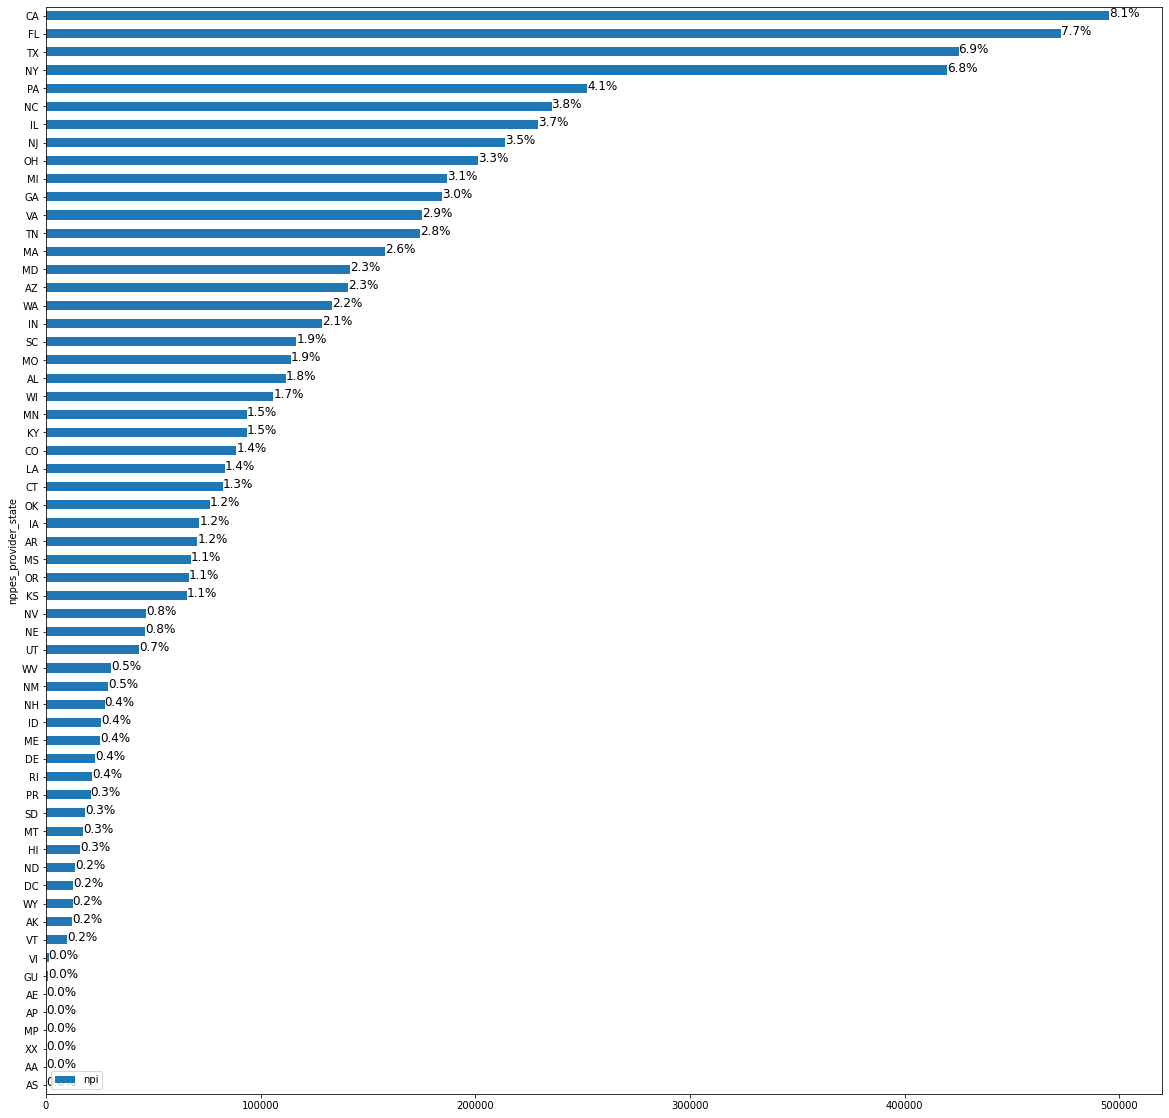

In [24]:
# #Multibar Plot

def horizontal_plot(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width()
        y = p.get_y() + p.get_height() / 2 - 0.05
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
ax = medicare_new[['npi','nppes_provider_state']].groupby(by=['nppes_provider_state']).count().sort_values(by='npi',ascending=True).plot(kind='barh', figsize=(20,20))

horizontal_plot(ax,medicare_new['npi'] )


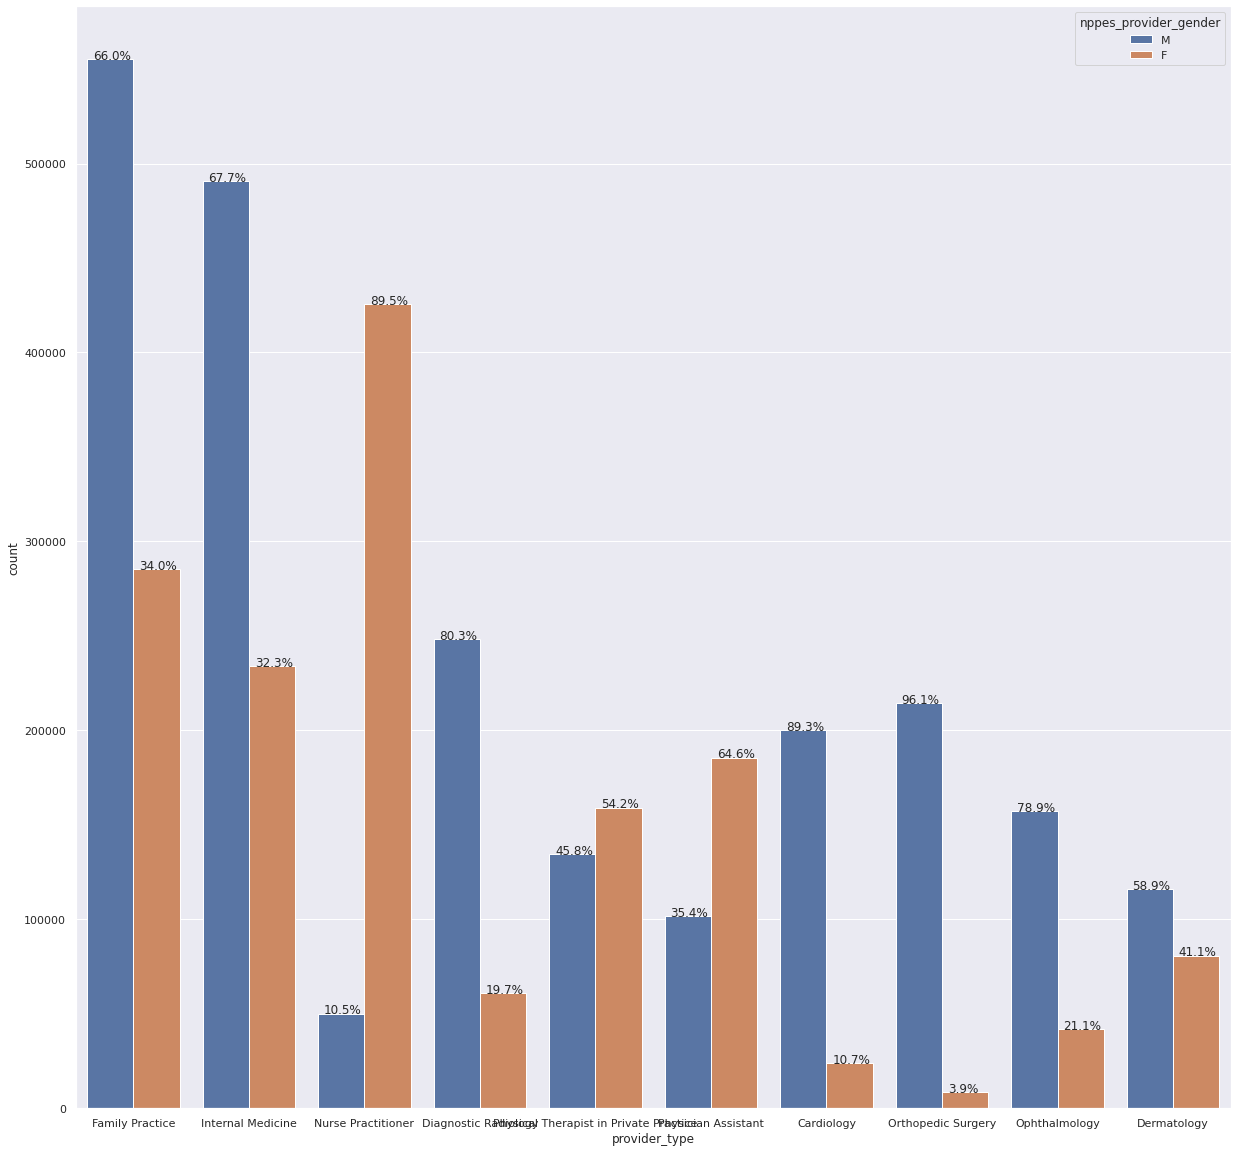

In [25]:
#Visualization of provider speciality by ; Provider Type,  Gender of the Provider
sns.set(rc={'figure.figsize':(20.7,20.27)})


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2-0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height()
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
            
ax= sns.countplot(x='provider_type',hue= 'nppes_provider_gender', data= medicare_new, order = medicare_new['provider_type'].value_counts().nlargest(10).index)
with_hue(ax,medicare_new['provider_type'],10,2)



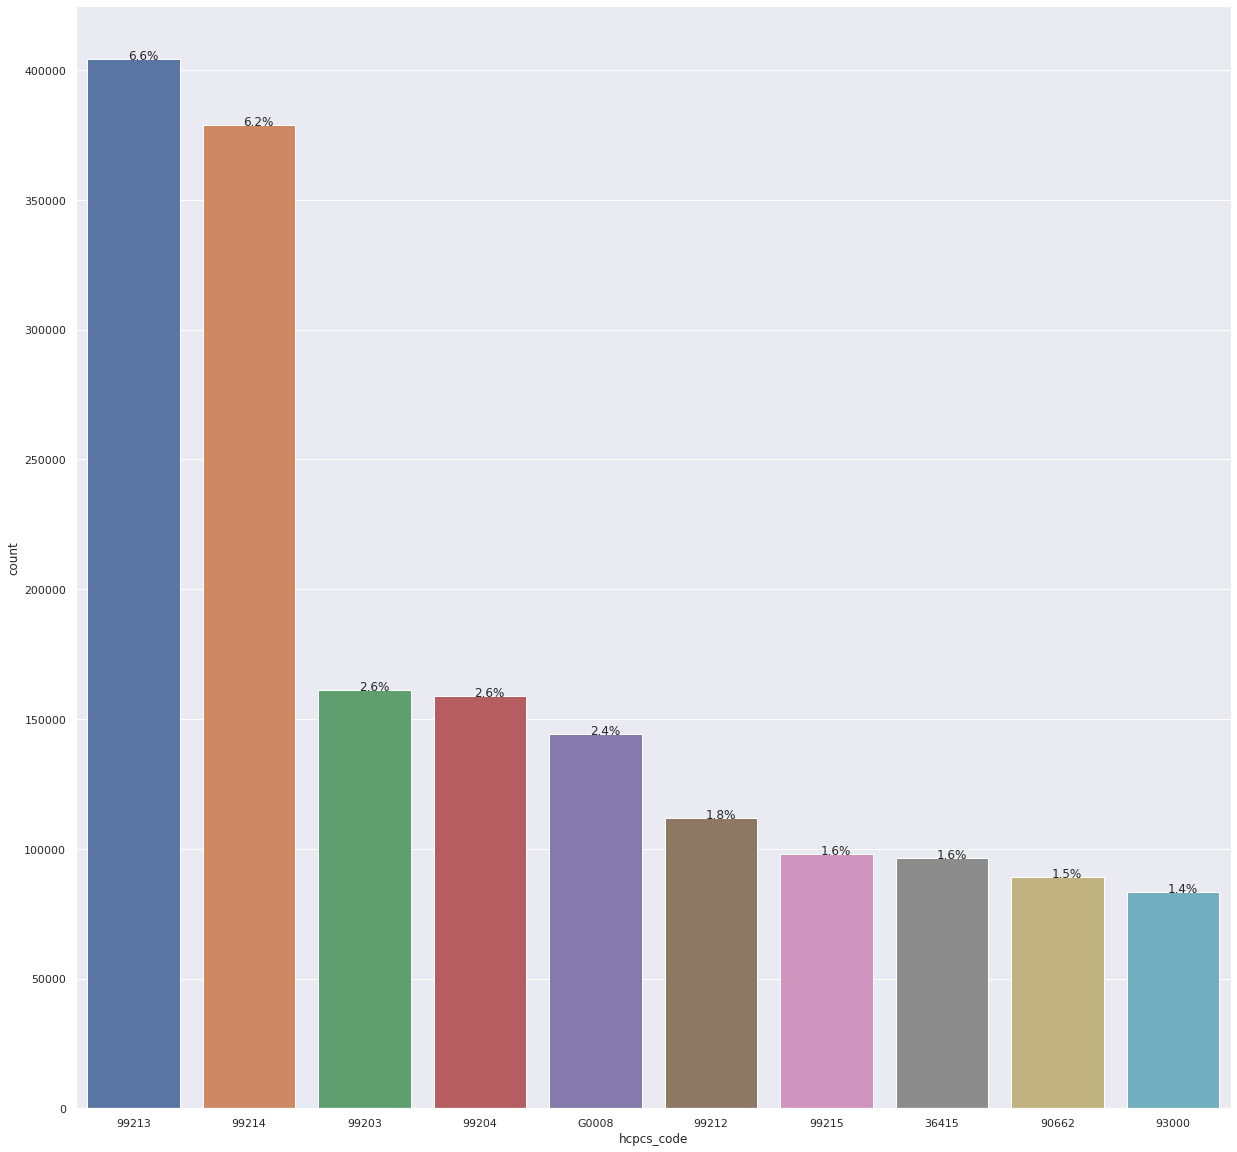

In [26]:
#Top 10 HCPCS CODE based on count, HCPCS Code , 'HCPCS Description'
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

HCPCS_plt= medicare_new['hcpcs_code'].value_counts()[:10]
ax = sns.countplot(x='hcpcs_code', data= medicare_new, order = medicare_new['hcpcs_code'].value_counts().nlargest(10).index)
without_hue(ax,medicare_new['hcpcs_code'])


In [27]:
print(HCPCS_plt)

99213    404353
99214    378799
99203    161256
99204    158932
G0008    144193
99212    111745
99215     98010
36415     96348
90662     89144
93000     83347
Name: hcpcs_code, dtype: int64


In [28]:
len(medicare_new['hcpcs_code'].unique())


4362

In [29]:
len(medicare_new['hcpcs_description'].unique())


3995

**The top physician visits codes for Physicians in their service area**
This gives customers insight into what is being seen in their community's physician's office
add total visits to another dataframe

In [30]:
#medicare_new[['nppes_provider_state','hcpcs_code','nppes_provider_city',]].groupby(by=['nppes_provider_state','nppes_provider_city','hcpcs_code']).size()

#hcpcs_codelist = ['99201','99202','99203','99204','99205','99211','99212','99213','99214','99215']
(medicare_new[(medicare_new['nppes_provider_state']=='CA')
                    &(medicare_new['place_of_service'] =='O')
            ]
)[['nppes_provider_city','hcpcs_code','total_submitted']].groupby(by=['nppes_provider_city','hcpcs_code']).agg({'total_submitted':'sum',
                                                                                                                                            }).sort_values(by='total_submitted', ascending=False).head(10)

total_submitted
nppes_provider_city hcpcs_code                 
LOS ANGELES         99214          8.117725e+07
SAN DIEGO           99214          4.877153e+07
LOS ANGELES         99213          4.847691e+07
SACRAMENTO          99214          4.482143e+07
SAN FRANCISCO       99214          4.273730e+07
                    99213          2.761528e+07
FRESNO              99214          2.706037e+07
SANTA MONICA        99214          2.701527e+07
SAN DIEGO           99213          2.574311e+07
LOS ANGELES         99215          2.462279e+07

In [31]:
medicare_new['hcpcs_code'].value_counts()

99213    404353
99214    378799
99203    161256
99204    158932
G0008    144193
          ...  
0044U         1
58555         1
93568         1
21935         1
69300         1
Name: hcpcs_code, Length: 4362, dtype: int64

**Correlation between frequency and submitted cost of service (Pearson correlation. no need plot)**

In [32]:
medicare_new1 = medicare_new[['hcpcs_code','total_submitted']].reset_index()
medicare_new1
#pd.set_option('mode.chained_assignment', None)

,index,hcpcs_code,total_submitted
0,27,76872,6498.0
1,36,99204,8610.0
2,37,99205,4575.0
3,39,99213,16132.0
4,41,99214,35934.0
...,...,...,...
6130961,9961858,69210,11880.0
6130962,9961859,82565,364.0
6130963,9961861,99203,23074.0
6130964,9961863,99204,43995.0


In [33]:

y=medicare_new1[['hcpcs_code','total_submitted']].groupby(["hcpcs_code"]).agg(
    count_col=pd.NamedAgg(column="hcpcs_code", aggfunc="count"), sum_submitted = pd.NamedAgg(column ="total_submitted",aggfunc="sum")).sort_values(by='count_col',ascending=False)


In [34]:
y.head()

,count_col,sum_submitted
hcpcs_code,,
99213,404353,9.710417e+09
99214,378799,1.551776e+10
99203,161256,2.103158e+09
99204,158932,2.826422e+09
G0008,144193,3.991024e+08


In [35]:
y['count_col'].corr(y['sum_submitted'])

0.8682800476583361

Who are the top billers? 
**Create a table to see the top 10 HCPCS codes
Columns: HCPCS codes, HCPCS description, Count, Average Medicare payment, Total Expenses ( Column 3 * Column 4)**

In [36]:
hcpcs_top10 = medicare_new[['hcpcs_code','total_medicare_payment']].groupby(["hcpcs_code"]).agg(
    count_col=pd.NamedAgg(column="hcpcs_code", aggfunc="count"), total_payment = pd.NamedAgg(column ="total_medicare_payment",aggfunc="sum")).sort_values(by='count_col',ascending=False)
hcpcs_top10.head(10)

,count_col,total_payment
hcpcs_code,,
99213,404353,3.302693e+09
99214,378799,5.241416e+09
99203,161256,6.853743e+08
99204,158932,9.817626e+08
G0008,144193,2.488723e+08
99212,111745,2.640597e+08
99215,98010,7.582165e+08
36415,96348,5.087565e+07
90662,89144,3.899902e+08


In [37]:
hcpcs_top10['Total_expenses'] = hcpcs_top10['total_payment']*hcpcs_top10['count_col']
hcpcs_top10.head(10)


,count_col,total_payment,Total_expenses
hcpcs_code,,,
99213,404353,3.302693e+09,1.335454e+15
99214,378799,5.241416e+09,1.985443e+15
99203,161256,6.853743e+08,1.105207e+14
99204,158932,9.817626e+08,1.560335e+14
G0008,144193,2.488723e+08,3.588564e+13
99212,111745,2.640597e+08,2.950735e+13
99215,98010,7.582165e+08,7.431280e+13
36415,96348,5.087565e+07,4.901767e+12
90662,89144,3.899902e+08,3.476529e+13
